In [1]:
from sklearn.metrics.pairwise import cosine_similarity

from bokeh.io import show, curdoc, output_notebook, push_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool, Select, Paragraph, TextInput
from bokeh.layouts import widgetbox, column, row
from ipywidgets import interact

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
import nltk

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer 

import markovify
import string

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
pdf = pd.read_csv('/Users/agorina/Desktop/Final/products_skincare_cleaned.csv')
pdf.head()

,Category,Brand,Product,Price,Rating,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1


In [3]:
udf = pd.read_csv('/Users/agorina/Desktop/Final/Userdata_Cleaned.csv')
udf.drop('Unnamed: 0', axis=1, inplace=True)
udf.head()

,Username,Skin_Tone,Skin_Type,Eye_Color,Hair_Color,Rating_Stars,Review,Product_Url
0,allyp3,Medium,Combination,Brown,Brunette,5,This is hands down the best cleanser I’ve ever...,https://www.sephora.com/product/kale-spinach-g...
1,PatTea,Medium,Combination,Brown,Red,1,Unfortunately this doesn’t work for everyone. ...,https://www.sephora.com/product/kale-spinach-g...
2,Sabi1991,No data,No data,No data,No data,5,My favorite cleanser!! i love the packaging on...,https://www.sephora.com/product/kale-spinach-g...
3,happyface2,Fair,Dry,Blue,Blonde,5,I love all things Youth To The People! This cl...,https://www.sephora.com/product/kale-spinach-g...
4,kimkix34,Fair,Normal,Green,Blonde,5,I had a trial size of this and was obsessed. M...,https://www.sephora.com/product/kale-spinach-g...


In [14]:
udf['Username'].value_counts()

Eye               62
wally22           19
Mitz17            18
irishgrl131       17
jen101            14
                  ..
KayleeJarrell2     1
SESO23             1
jwdiff             1
rockstarr          1
Lindsay7777777     1
Name: Username, Length: 13214, dtype: int64

In [16]:
wally_reviews = udf[udf['Username'] == 'wally22']
wally_reviews

,Username,Skin_Tone,Skin_Type,Eye_Color,Hair_Color,Rating_Stars,Review,Product_Url
711,wally22,Fair,Normal,Hazel,Brunette,4,This does exactly what it’s called. It’s very ...,https://www.sephora.com/product/checks-balance...
1831,wally22,Fair,Normal,Hazel,Brunette,5,I really really love this moisturizer!!! It’s ...,https://www.sephora.com/product/confidence-in-...
2095,wally22,Fair,Normal,Hazel,Brunette,5,A great moisturizer! It isn’t too greasy but i...,https://www.sephora.com/product/secret-sauce-c...
2276,wally22,Fair,Normal,Hazel,Brunette,5,Smells like a jolly rancher! I like that it’s ...,https://www.sephora.com/product/watermelon-glo...
2346,wally22,Fair,Normal,Hazel,Brunette,5,Smells amazing like the sleeping mask and real...,https://www.sephora.com/product/watermelon-pin...
3066,wally22,Fair,Normal,Hazel,Brunette,5,I love this milky hydrator. It really works we...,https://www.sephora.com/product/all-day-hydrat...
5775,wally22,Fair,Normal,Hazel,Brunette,4,This does exactly what it’s called. It’s very ...,https://www.sephora.com/product/checks-balance...
6359,wally22,Fair,Normal,Hazel,Brunette,5,I’m not a blueberry fan at all but this smells...,https://www.sephora.com/product/blueberry-boun...
6757,wally22,Fair,Normal,Hazel,Brunette,5,This is a go to for me when I feel like my ski...,https://www.sephora.com/product/rub-a-dub-refi...
6902,wally22,Fair,Normal,Hazel,Brunette,5,It definitely does tingle but in a good way! I...,https://www.sephora.com/product/knockout-tingl...


In [22]:
my_neighbors = udf[(udf['Eye_Color'] == 'Green') & (udf['Hair_Color'] == 'Brunette') & (udf['Skin_Type'] == 'Combination') & (udf['Skin_Tone'] == 'Light')]
my_neighbors['Username'].value_counts()

dancouns           7
AngeKathy          5
alafair            4
southernbell29     4
allijane0626       3
                  ..
WLB219             1
SarahPurps         1
sarahvictoria91    1
Jkimbeauty         1
jk22301            1
Name: Username, Length: 103, dtype: int64

In [4]:
from ast import literal_eval
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import wordnet
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

import warnings; warnings.simplefilter('ignore')

Text(0.5, 1.0, 'Distribution of Ratings')

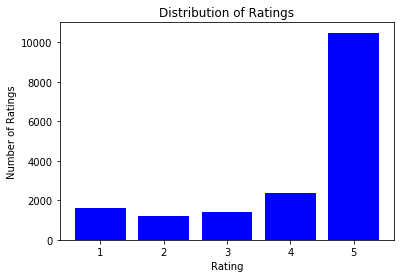

In [5]:
ratings_sorted = sorted(list(zip(udf.Rating_Stars.value_counts().index, udf.Rating_Stars.value_counts())))
plt.bar([r[0] for r in ratings_sorted], [r[1] for r in ratings_sorted], color='blue')
plt.xlabel("Rating")
plt.ylabel("Number of Ratings")
plt.title("Distribution of Ratings")

In [28]:
print('Number of products: ', len(udf['Product_Url'].unique()))
print('Number of users: ', len(udf['Username'].unique()))
print("Average Number of Reviews per product: ", udf.shape[0]/udf.Product_Url.nunique())
print("Average Number of Reviews per user: ", udf.shape[0]/udf.Username.nunique())

Number of products:  633
Number of users:  13214
Average Number of Reviews per product:  26.85781990521327
Average Number of Reviews per user:  1.286589980323899


In [8]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
udf['user_id'] = label.fit_transform(udf['Username'])
udf['product_id'] = label.fit_transform(udf['Product_Url'])
udf.head()

,Username,Skin_Tone,Skin_Type,Eye_Color,Hair_Color,Rating_Stars,Review,Product_Url,user_id,product_id
0,allyp3,Medium,Combination,Brown,Brunette,5,This is hands down the best cleanser I’ve ever...,https://www.sephora.com/product/kale-spinach-g...,6485,296
1,PatTea,Medium,Combination,Brown,Red,1,Unfortunately this doesn’t work for everyone. ...,https://www.sephora.com/product/kale-spinach-g...,4690,296
2,Sabi1991,No data,No data,No data,No data,5,My favorite cleanser!! i love the packaging on...,https://www.sephora.com/product/kale-spinach-g...,5138,296
3,happyface2,Fair,Dry,Blue,Blonde,5,I love all things Youth To The People! This cl...,https://www.sephora.com/product/kale-spinach-g...,8577,296
4,kimkix34,Fair,Normal,Green,Blonde,5,I had a trial size of this and was obsessed. M...,https://www.sephora.com/product/kale-spinach-g...,9627,296


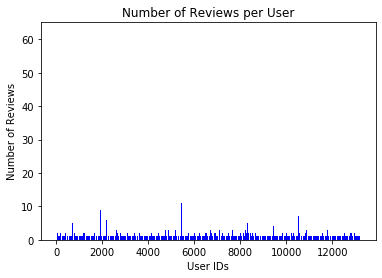

In [32]:
ratings_per_user = udf.user_id.value_counts()
ratings_per_user = sorted(list(zip(ratings_per_user.index, ratings_per_user)))
plt.bar([r[0] for r in ratings_per_user], [r[1] for r in ratings_per_user], color='blue')
plt.xlabel("User IDs")
plt.ylabel("Number of Reviews")
plt.title("Number of Reviews per User")
plt.show()

In [6]:
from surprise import Dataset, Reader
from surprise import SVD
from surprise import accuracy
from surprise.model_selection import cross_validate, train_test_split

In [9]:
data = udf[['user_id', 'Product_Url', 'Rating_Stars']]
reader = Reader(line_format='user item rating', sep=',')
data = Dataset.load_from_df(data, reader=reader)

trainset, testset = train_test_split(data, test_size=.2)

In [10]:
svd = SVD()
svd.fit(trainset)

In [11]:
predictions = svd.test(testset)
accuracy.rmse(predictions)
accuracy.mae(predictions)

RMSE: 1.2405
MAE:  0.9827


0.9827451956404848

In [12]:
predictions[:5]

[Prediction(uid=10683, iid='https://www.sephora.com/product/rinse-off-eye-makeup-solvent-P122763?icid2=products%20grid:p122763', r_ui=1.0, est=3.8858924617521757, details={'was_impossible': False}),
 Prediction(uid=9980, iid='https://www.sephora.com/product/clarifying-lotion-2-P122882?icid2=products%20grid:p122882', r_ui=5.0, est=3.940699137741733, details={'was_impossible': False}),
 Prediction(uid=4205, iid='https://www.sephora.com/product/alpha-beta-pore-perfecting-refining-serum-P447592?icid2=products%20grid:p447592', r_ui=5.0, est=4.625640390690417, details={'was_impossible': False}),
 Prediction(uid=9929, iid='https://www.sephora.com/product/benefiance-nutriperfect-night-cream-P202935?icid2=products%20grid:p202935', r_ui=4.0, est=4.639715341690269, details={'was_impossible': False}),
 Prediction(uid=9902, iid='https://www.sephora.com/product/checks-balances-frothy-face-wash-P297516?icid2=products%20grid:p297516', r_ui=5.0, est=4.716434287599889, details={'was_impossible': False})

In [13]:
from surprise.model_selection import RandomizedSearchCV

params = {'n_factors': [1,5,10,25,50,75,100], 'reg_all': [.005,.01,.02,.05,.1,.25,.5], 'lr_all':[.005,.01,.02,.05,.1,.25,.5],
         'n_epochs': [10,20,50]}
model = RandomizedSearchCV(SVD,param_distributions=params,n_jobs=-1,joblib_verbose=10, cv=5)
model.fit(data)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:   12.7s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed:   14.3s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   15.2s finished


In [14]:
print(model.best_score)
print(model.best_params)

{'rmse': 1.2161835545964816, 'mae': 0.8856140748869132}
{'rmse': {'n_factors': 5, 'reg_all': 0.02, 'lr_all': 0.02, 'n_epochs': 50}, 'mae': {'n_factors': 50, 'reg_all': 0.1, 'lr_all': 0.5, 'n_epochs': 10}}


In [15]:
better = SVD(n_factors=5,reg_all=.01,lr_all=.02,n_epochs=20)
better.fit(trainset)
better_preds = better.test(testset)
accuracy.rmse(better_preds)
accuracy.mae(better_preds)

RMSE: 1.2181
MAE:  0.9209


0.920949364180832

In [42]:
udf.head()

,Username,Skin_Tone,Skin_Type,Eye_Color,Hair_Color,Rating_Stars,Review,Product_Url,user_id,product_id
0,allyp3,Medium,Combination,Brown,Brunette,5,This is hands down the best cleanser I’ve ever...,https://www.sephora.com/product/kale-spinach-g...,6485,296
1,PatTea,Medium,Combination,Brown,Red,1,Unfortunately this doesn’t work for everyone. ...,https://www.sephora.com/product/kale-spinach-g...,4690,296
2,Sabi1991,No data,No data,No data,No data,5,My favorite cleanser!! i love the packaging on...,https://www.sephora.com/product/kale-spinach-g...,5138,296
3,happyface2,Fair,Dry,Blue,Blonde,5,I love all things Youth To The People! This cl...,https://www.sephora.com/product/kale-spinach-g...,8577,296
4,kimkix34,Fair,Normal,Green,Blonde,5,I had a trial size of this and was obsessed. M...,https://www.sephora.com/product/kale-spinach-g...,9627,296


In [16]:
#df['period'] = df[['Year', 'quarter', ...]].agg('-'.join, axis=1)

udf['User_Description'] = udf[['Skin_Tone', 'Skin_Type','Eye_Color', 'Hair_Color']].agg(' '.join, axis=1)
udf.head()

,Username,Skin_Tone,Skin_Type,Eye_Color,Hair_Color,Rating_Stars,Review,Product_Url,user_id,product_id,User_Description
0,allyp3,Medium,Combination,Brown,Brunette,5,This is hands down the best cleanser I’ve ever...,https://www.sephora.com/product/kale-spinach-g...,6485,296,Medium Combination Brown Brunette
1,PatTea,Medium,Combination,Brown,Red,1,Unfortunately this doesn’t work for everyone. ...,https://www.sephora.com/product/kale-spinach-g...,4690,296,Medium Combination Brown Red
2,Sabi1991,No data,No data,No data,No data,5,My favorite cleanser!! i love the packaging on...,https://www.sephora.com/product/kale-spinach-g...,5138,296,No data No data No data No data
3,happyface2,Fair,Dry,Blue,Blonde,5,I love all things Youth To The People! This cl...,https://www.sephora.com/product/kale-spinach-g...,8577,296,Fair Dry Blue Blonde
4,kimkix34,Fair,Normal,Green,Blonde,5,I had a trial size of this and was obsessed. M...,https://www.sephora.com/product/kale-spinach-g...,9627,296,Fair Normal Green Blonde


In [46]:
udf.User_Description.value_counts()

No data No data No data No data       5060
Medium Combination Brown Brunette      521
Light Combination Brown Brunette       471
Medium Combination Brown Black         341
Fair Combination Brown Brunette        278
                                      ... 
Dark Combination Brown Auburn            1
Olive Combination No data Brunette       1
Porcelain Normal Gray Brunette           1
No data No data Hazel Gray               1
Tan Dry Blue Blonde                      1
Name: User_Description, Length: 547, dtype: int64

In [23]:
list_of_products = udf.Product_Url.unique().tolist()
len(list_of_products)

633

In [71]:
#>>> ["foo", "bar", "baz"].index("bar")
list_of_products.index('https://www.sephora.com/product/beste-no-9-jelly-cleanser-P426836?icid2=products%20grid:p426836')

9

In [18]:
from bs4 import BeautifulSoup as BS
from selenium import webdriver
import time
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import Select
from selenium import webdriver

In [19]:
chrome_path = r"/Users/agorina/Downloads/chromedriver"
driver = webdriver.Chrome(chrome_path)

In [20]:
import time

In [21]:
def get_product_names(list_of_urls):
    product_names = []
    urls = []
    for url in list_of_urls:
        try:
            driver.get(url)
            z = driver.find_element_by_class_name("css-140z8k4 ")
            p = z.find_elements_by_css_selector('span')[1]
            product_names.append(p.text)
            urls.append(driver.current_url)

            time.sleep(.5)
        
        except:
            continue
        
    df = pd.DataFrame()
    df['Urls'] = urls
    df['Product_Name'] = product_names
    df.to_csv('/Users/agorina/Desktop/Final/KeyDataframe.csv')
    return df

In [75]:
#list_of_names = get_product_names(list_of_products[50:])

In [22]:
get_product_names(list_of_products)

,Urls,Product_Name
0,https://www.sephora.com/product/kale-spinach-g...,Superfood Antioxidant Cleanser
1,https://www.sephora.com/product/the-ordinary-d...,Glycolic Acid 7% Toning Solution
2,https://www.sephora.com/product/soy-face-clean...,Soy Make Up Removing Face Wash
3,https://www.sephora.com/product/green-clean-ma...,Green Clean Makeup Removing Cleansing Balm
4,https://www.sephora.com/product/facial-treatme...,Facial Treatment Essence (Pitera Essence)
...,...,...
627,https://www.sephora.com/product/peptide-21-wri...,Peptide 21™ Wrinkle Resist Serum
628,https://www.sephora.com/product/the-microdeliv...,The Microdelivery Resurfacing Peel
629,https://www.sephora.com/product/ferulic-retino...,Ferulic + Retinol Wrinkle Recovery Overnight S...
630,https://www.sephora.com/product/strawberry-c-s...,Strawberry-C Brightening Serum


In [27]:
key_df = pd.read_csv('/Users/agorina/Desktop/Final/KeyDataframe.csv')
key_df.drop('Unnamed: 0', axis=1, inplace=True)
key_df.head()

,Urls,Product_Name
0,https://www.sephora.com/product/kale-spinach-g...,Superfood Antioxidant Cleanser
1,https://www.sephora.com/product/the-ordinary-d...,Glycolic Acid 7% Toning Solution
2,https://www.sephora.com/product/soy-face-clean...,Soy Make Up Removing Face Wash
3,https://www.sephora.com/product/green-clean-ma...,Green Clean Makeup Removing Cleansing Balm
4,https://www.sephora.com/product/facial-treatme...,Facial Treatment Essence (Pitera Essence)


In [34]:
l = key_df['Urls'].tolist()
missing = [url for url in list_of_products if url not in l]
missing

['https://www.sephora.com/product/black-pine-antiaging-firming-lifting-day-cream-P428251?icid2=products%20grid:p428251']

In [33]:
key_df['Urls'][9]

'https://www.sephora.com/product/beste-no-9-jelly-cleanser-P426836?icid2=products%20grid:p426836'

In [70]:
#'https://www.sephora.com/product/beste-no-9-jelly-cleanser-P426836?icid2=products%20grid:p426836'
problem_list = ['https://www.sephora.com/product/purity-made-simple-P7109?icid2=products%20grid:p7109',
 'https://www.sephora.com/product/beste-no-9-jelly-cleanser-P426836?icid2=products%20grid:p426836',
 'https://www.sephora.com/product/polished-rice-enzyme-powder-P426340?icid2=products%20grid:p426340']
names = []
for url in problem_list:
    driver.get(url)
    z = driver.find_element_by_class_name("css-140z8k4 ")
    p = z.find_elements_by_css_selector('span')[1]
    names.append(p.text)
names

['Purity Made Simple Cleanser',
 'Beste™ No. 9 Jelly Cleanser',
 'The Rice Polish Foaming Enzyme Powder']

In [5]:
keydf = pd.read_csv('/Users/agorina/Desktop/Final/KeyDataframe.csv')
keydf.drop('Unnamed: 0', axis=1, inplace=True)

keydf.head()

,Urls,Product_Name
0,https://www.sephora.com/product/kale-spinach-g...,Superfood Antioxidant Cleanser
1,https://www.sephora.com/product/the-ordinary-d...,Glycolic Acid 7% Toning Solution
2,https://www.sephora.com/product/soy-face-clean...,Soy Make Up Removing Face Wash
3,https://www.sephora.com/product/green-clean-ma...,Green Clean Makeup Removing Cleansing Balm
4,https://www.sephora.com/product/facial-treatme...,Facial Treatment Essence (Pitera Essence)


In [7]:
udf[udf['Product_Url'] != 'https://www.sephora.com/product/black-pine-antiaging-firming-lifting-day-cream-P428251?icid2=products%20grid:p428251']

,Username,Skin_Tone,Skin_Type,Eye_Color,Hair_Color,Rating_Stars,Review,Product_Url
0,allyp3,Medium,Combination,Brown,Brunette,5,This is hands down the best cleanser I’ve ever...,https://www.sephora.com/product/kale-spinach-g...
1,PatTea,Medium,Combination,Brown,Red,1,Unfortunately this doesn’t work for everyone. ...,https://www.sephora.com/product/kale-spinach-g...
2,Sabi1991,No data,No data,No data,No data,5,My favorite cleanser!! i love the packaging on...,https://www.sephora.com/product/kale-spinach-g...
3,happyface2,Fair,Dry,Blue,Blonde,5,I love all things Youth To The People! This cl...,https://www.sephora.com/product/kale-spinach-g...
4,kimkix34,Fair,Normal,Green,Blonde,5,I had a trial size of this and was obsessed. M...,https://www.sephora.com/product/kale-spinach-g...
...,...,...,...,...,...,...,...,...
16996,pigbananas,Fair,Combination,Brown,Black,5,I LOVE THIS TO DEATH. My review is a bit lengt...,https://www.sephora.com/product/clinique-id-yo...
16997,Anthiya,Olive,Combination,Brown,Black,4,This product did work for my skin but I found ...,https://www.sephora.com/product/clinique-id-yo...
16998,RaquelR16,Fair,Combination,Brown,Brunette,5,This worked so fast to heal my skin after anot...,https://www.sephora.com/product/clinique-id-yo...
16999,JacquelineRuby,Porcelain,Oily,Green,Blonde,5,This is AMAZING. The jelly and the blue cartri...,https://www.sephora.com/product/clinique-id-yo...


In [8]:
joined_df = udf.merge(keydf, left_on='Product_Url', right_on='Urls')
joined_df.head()

,Username,Skin_Tone,Skin_Type,Eye_Color,Hair_Color,Rating_Stars,Review,Product_Url,Urls,Product_Name
0,allyp3,Medium,Combination,Brown,Brunette,5,This is hands down the best cleanser I’ve ever...,https://www.sephora.com/product/kale-spinach-g...,https://www.sephora.com/product/kale-spinach-g...,Superfood Antioxidant Cleanser
1,PatTea,Medium,Combination,Brown,Red,1,Unfortunately this doesn’t work for everyone. ...,https://www.sephora.com/product/kale-spinach-g...,https://www.sephora.com/product/kale-spinach-g...,Superfood Antioxidant Cleanser
2,Sabi1991,No data,No data,No data,No data,5,My favorite cleanser!! i love the packaging on...,https://www.sephora.com/product/kale-spinach-g...,https://www.sephora.com/product/kale-spinach-g...,Superfood Antioxidant Cleanser
3,happyface2,Fair,Dry,Blue,Blonde,5,I love all things Youth To The People! This cl...,https://www.sephora.com/product/kale-spinach-g...,https://www.sephora.com/product/kale-spinach-g...,Superfood Antioxidant Cleanser
4,kimkix34,Fair,Normal,Green,Blonde,5,I had a trial size of this and was obsessed. M...,https://www.sephora.com/product/kale-spinach-g...,https://www.sephora.com/product/kale-spinach-g...,Superfood Antioxidant Cleanser


In [9]:
pdf.head()

,Category,Brand,Product,Price,Rating,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1


In [10]:
bigdf = joined_df.merge(pdf, left_on='Product_Name', right_on='Product')
bigdf.head()

,Username,Skin_Tone,Skin_Type,Eye_Color,Hair_Color,Rating_Stars,Review,Product_Url,Urls,Product_Name,...,Brand,Product,Price,Rating,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,allyp3,Medium,Combination,Brown,Brunette,5,This is hands down the best cleanser I’ve ever...,https://www.sephora.com/product/kale-spinach-g...,https://www.sephora.com/product/kale-spinach-g...,Superfood Antioxidant Cleanser,...,YOUTH TO THE PEOPLE,Superfood Antioxidant Cleanser,36,4.4,"Water, Sodium Cocoyl Glutamate, Cocamidopropyl...",0,0,0,0,0
1,PatTea,Medium,Combination,Brown,Red,1,Unfortunately this doesn’t work for everyone. ...,https://www.sephora.com/product/kale-spinach-g...,https://www.sephora.com/product/kale-spinach-g...,Superfood Antioxidant Cleanser,...,YOUTH TO THE PEOPLE,Superfood Antioxidant Cleanser,36,4.4,"Water, Sodium Cocoyl Glutamate, Cocamidopropyl...",0,0,0,0,0
2,Sabi1991,No data,No data,No data,No data,5,My favorite cleanser!! i love the packaging on...,https://www.sephora.com/product/kale-spinach-g...,https://www.sephora.com/product/kale-spinach-g...,Superfood Antioxidant Cleanser,...,YOUTH TO THE PEOPLE,Superfood Antioxidant Cleanser,36,4.4,"Water, Sodium Cocoyl Glutamate, Cocamidopropyl...",0,0,0,0,0
3,happyface2,Fair,Dry,Blue,Blonde,5,I love all things Youth To The People! This cl...,https://www.sephora.com/product/kale-spinach-g...,https://www.sephora.com/product/kale-spinach-g...,Superfood Antioxidant Cleanser,...,YOUTH TO THE PEOPLE,Superfood Antioxidant Cleanser,36,4.4,"Water, Sodium Cocoyl Glutamate, Cocamidopropyl...",0,0,0,0,0
4,kimkix34,Fair,Normal,Green,Blonde,5,I had a trial size of this and was obsessed. M...,https://www.sephora.com/product/kale-spinach-g...,https://www.sephora.com/product/kale-spinach-g...,Superfood Antioxidant Cleanser,...,YOUTH TO THE PEOPLE,Superfood Antioxidant Cleanser,36,4.4,"Water, Sodium Cocoyl Glutamate, Cocamidopropyl...",0,0,0,0,0


In [11]:
bigdf.to_csv('/Users/agorina/Desktop/Final/mergeddata.csv')

In [12]:
bigdf

,Username,Skin_Tone,Skin_Type,Eye_Color,Hair_Color,Rating_Stars,Review,Product_Url,Urls,Product_Name,...,Brand,Product,Price,Rating,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,allyp3,Medium,Combination,Brown,Brunette,5,This is hands down the best cleanser I’ve ever...,https://www.sephora.com/product/kale-spinach-g...,https://www.sephora.com/product/kale-spinach-g...,Superfood Antioxidant Cleanser,...,YOUTH TO THE PEOPLE,Superfood Antioxidant Cleanser,36,4.4,"Water, Sodium Cocoyl Glutamate, Cocamidopropyl...",0,0,0,0,0
1,PatTea,Medium,Combination,Brown,Red,1,Unfortunately this doesn’t work for everyone. ...,https://www.sephora.com/product/kale-spinach-g...,https://www.sephora.com/product/kale-spinach-g...,Superfood Antioxidant Cleanser,...,YOUTH TO THE PEOPLE,Superfood Antioxidant Cleanser,36,4.4,"Water, Sodium Cocoyl Glutamate, Cocamidopropyl...",0,0,0,0,0
2,Sabi1991,No data,No data,No data,No data,5,My favorite cleanser!! i love the packaging on...,https://www.sephora.com/product/kale-spinach-g...,https://www.sephora.com/product/kale-spinach-g...,Superfood Antioxidant Cleanser,...,YOUTH TO THE PEOPLE,Superfood Antioxidant Cleanser,36,4.4,"Water, Sodium Cocoyl Glutamate, Cocamidopropyl...",0,0,0,0,0
3,happyface2,Fair,Dry,Blue,Blonde,5,I love all things Youth To The People! This cl...,https://www.sephora.com/product/kale-spinach-g...,https://www.sephora.com/product/kale-spinach-g...,Superfood Antioxidant Cleanser,...,YOUTH TO THE PEOPLE,Superfood Antioxidant Cleanser,36,4.4,"Water, Sodium Cocoyl Glutamate, Cocamidopropyl...",0,0,0,0,0
4,kimkix34,Fair,Normal,Green,Blonde,5,I had a trial size of this and was obsessed. M...,https://www.sephora.com/product/kale-spinach-g...,https://www.sephora.com/product/kale-spinach-g...,Superfood Antioxidant Cleanser,...,YOUTH TO THE PEOPLE,Superfood Antioxidant Cleanser,36,4.4,"Water, Sodium Cocoyl Glutamate, Cocamidopropyl...",0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8698,Tinkfairy,Fair,Combination,Hazel,Brunette,5,I was looking for a overnight serum with retin...,https://www.sephora.com/product/ferulic-retino...,https://www.sephora.com/product/ferulic-retino...,Ferulic + Retinol Wrinkle Recovery Overnight S...,...,DR. DENNIS GROSS SKINCARE,Ferulic + Retinol Wrinkle Recovery Overnight S...,88,4.4,"Water, DiCaprylyl Carbonate, Niacinamide, Cety...",1,1,1,1,1
8699,baeyonce,Light,Combination,Blue,Blonde,5,I have never experienced such fast results in ...,https://www.sephora.com/product/ferulic-retino...,https://www.sephora.com/product/ferulic-retino...,Ferulic + Retinol Wrinkle Recovery Overnight S...,...,DR. DENNIS GROSS SKINCARE,Ferulic + Retinol Wrinkle Recovery Overnight S...,88,4.4,"Water, DiCaprylyl Carbonate, Niacinamide, Cety...",1,1,1,1,1
8700,JustJC,Dark,Combination,Brown,Black,5,Holy grail product for me! Everyone can tell w...,https://www.sephora.com/product/ferulic-retino...,https://www.sephora.com/product/ferulic-retino...,Ferulic + Retinol Wrinkle Recovery Overnight S...,...,DR. DENNIS GROSS SKINCARE,Ferulic + Retinol Wrinkle Recovery Overnight S...,88,4.4,"Water, DiCaprylyl Carbonate, Niacinamide, Cety...",1,1,1,1,1
8701,Latchmi,No data,No data,No data,No data,5,I love this product very much. Very much ! Exp...,https://www.sephora.com/product/ferulic-retino...,https://www.sephora.com/product/ferulic-retino...,Ferulic + Retinol Wrinkle Recovery Overnight S...,...,DR. DENNIS GROSS SKINCARE,Ferulic + Retinol Wrinkle Recovery Overnight S...,88,4.4,"Water, DiCaprylyl Carbonate, Niacinamide, Cety...",1,1,1,1,1
